## HIV 

In [1]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *
from matplotlib import pyplot as plt

In [2]:
def make_system(dt, gamma, mu, tau, beta, rho, alpha, sigma, delta, pi):
    init = State(R=200, L=0, E=0, V=4e-7)
    """
    make_system creates a system to store the parameters and initial conditions.

    Arguments:
        dt: time step
        gamma - delta: model parameters
    """

    t_0 = 0
    t_end = 120 # days

    return System(
        init=init,
        t_0=t_0,
        t_end=t_end,
        dt=dt,
        gamma=gamma,
        mu=mu,
        tau=tau,
        beta=beta,
        rho=rho,
        alpha=alpha,
        sigma=sigma,
        delta=delta,
        pi=pi
    )

In [3]:
def update_func(state, t, system):
    """
    update_func updates accepts a state and returns a new state with updated values

    Arguments:
        state (State) -> a state variable containing values for R, L, E, and V
        t -> the time step
        system -> the system variable containing dt and the various parameters
    """
    r, l, e, v = state

    s = system # use shorthand for system variables

    drdt = (s.gamma * s.tau) - (s.mu * r) - (s.beta * r * v)
    dldt = (s.rho * s.beta * r * v) - (s.mu * l) - (s.alpha * l)
    dedt = (1 - s.rho) * (s.beta * r * v) + (s.alpha * l) - (s.delta * e)
    dvdt = (s.pi * e) - (s.sigma*v)

    r += drdt * s.dt
    l += dldt * s.dt
    e += dedt * s.dt
    v += dvdt * s.dt

    return State(R=r, L=l, E=e, V=v)

In [7]:
def run_simulation(system, update_func):
    """
    run_simulation accepts a system and update function and simulates the evolution of the HIV virus

    Arguments:
        system (System): the system variable, including the initial state
        update_func (function): the function that handles the updating of state
    """
#     R = TimeSeries()
#     L = TimeSeries()
#     E = TimeSeries()
#     V = TimeSeries()
    frame = TimeFrame(columns=system.init.index)

#     state = system.init
    frame.row[system.t_0] = system.init

#     R[system.t_0], L[system.t_0], E[system.t_0], V[system.t_0] = state

    for t in linrange(system.t_0, system.t_end, system.dt):
#         state = update_func(state, t, system)
#         R[t+1], L[t+1], E[t+1], V[t+1] = state
        frame.row[t + system.dt] = update_func(frame.row[t], t, system)

    return frame

In [9]:
def plot_results(*args, **kwargs):
    """
    plot_results accepts any arguments and keyword arguments and creates a graph using the keyword arguments (ignoring the arguments)

    Arguments:
        (any)

    Keyword Arguments:
        (any)
    """
    for key in kwargs:
        plot(kwargs[key], '-', label=key)
    decorate(xlabel='Time (days)', ylabel="Quantity")

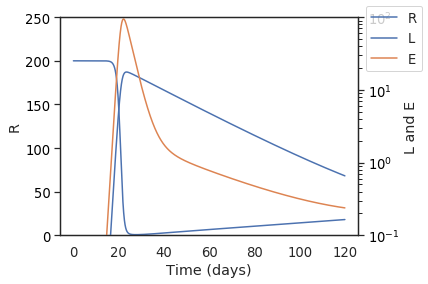

In [11]:
system = make_system(
    dt= 80.0 / (60 * 24),
    gamma=1.36,
    mu=1.36e-3,
    tau=.2,
    beta=.00027,
    rho=0.1,
    alpha=3.6e-2,
    sigma=2.0,
    delta=0.33,
    pi=100
)

frame = run_simulation(system, update_func)

R = frame.R
L = frame.L
E = frame.E
V = frame.V

fig, ax1 = plt.subplots()
color = 'tab:red'
ax1.set_xlabel("Time (days)")
ax1.set_ylabel("R")
ax1.set_ylim([0, 250])
ax1.plot(R, label="R")
ax1.tick_params(axis="y", labelcolor='black')

ax2 = ax1.twinx()

color = "tab:blue"
ax2.set_ylabel("L and E")
ax2.set_yscale('log')
ax2.set_ylim([1e-1, 1e2])
ax2.plot(L, label="L")
ax2.plot(E, label="E")
ax2.tick_params(axis="y", labelcolor='black')
fig.tight_layout()
fig.legend()
plt.show()